In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.finfo(np.float32).eps, np.sqrt(np.finfo(np.float32).eps), np.power(np.finfo(np.float32).eps, 0.7)

(1.1920929e-07, 0.00034526698, 1.4236953606213502e-05)

In [3]:
np.finfo(np.float64).eps, np.sqrt(np.finfo(np.float64).eps)

(2.220446049250313e-16, 1.4901161193847656e-08)

In [4]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib/keras_ex')
from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [5]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [6]:
#lm, model_gkernel = make_model_gkernel2()
lm, model_gkernel = make_model_gkernel3()
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1003 23:37:22.399705 139705640372032 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 23:37:22.439805 139705640372032 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 23:37:22.455792 139705640372032 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1003 23:37:22.456691 139705640372032 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 2)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = make_model(nn=4, num_cls=3, make_model_gkernel=make_model_gkernel3)
model.summary()

W1003 23:37:22.750216 139705640372032 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 9         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 18
Trainable params: 9
Non-trainable params: 9
_________________________________________________________________


In [9]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

W1003 23:37:22.885045 139705640372032 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 0s - loss: 1.1024 - acc: 0.2000
Epoch 2/5
 - 0s - loss: 1.0994 - acc: 0.3467
Epoch 3/5
 - 0s - loss: 1.0997 - acc: 0.3333
Epoch 4/5
 - 0s - loss: 1.0989 - acc: 0.3467
Epoch 5/5
 - 0s - loss: 1.0994 - acc: 0.3333


In [10]:
pred = model.predict(xtrain)
pred[:5]

array([[0.36504042, 0.32047284, 0.31448668],
       [0.3650514 , 0.3204548 , 0.31449383],
       [0.3650271 , 0.32049307, 0.31447983],
       [0.36503118, 0.3204862 , 0.3144826 ],
       [0.36503652, 0.3204776 , 0.31448582]], dtype=float32)

In [11]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([37, 42, 23])

In [12]:
model.save('saved_model')

In [13]:
ls -la

合計 4980
drwxrwxr-x. 3 admin admin     189 10月  3 23:36 ./
drwxrwxr-x. 7 admin admin    4096  9月 16 10:46 ../
drwxr-xr-x. 2 admin admin     199 10月  2 21:42 .ipynb_checkpoints/
-rw-rw-r--. 1 admin admin  876075 10月  3 22:52 dev_001-iris.ipynb
-rw-rw-r--. 1 admin admin  168745 10月  3 23:36 dev_002-digits8.ipynb
-rw-rw-r--. 1 admin admin 2289906 10月  3 22:54 dev_003-moon.ipynb
-rw-rw-r--. 1 admin admin 1567199 10月  2 22:29 dev_004-moon2.ipynb
-rw-rw-r--. 1 admin admin  156815 10月  2 23:18 dev_005-digits28.ipynb
-rw-rw-r--. 1 admin admin   21904 10月  3 23:37 saved_model


In [14]:
from keras.models import load_model

In [15]:
# load_model('saved_model', custom_objects={'GaussianKernel2': GaussianKernel2})
m = load_model('saved_model', custom_objects={'GaussianKernel3': GaussianKernel3})

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [16]:
pred = m.predict(xtrain)
pred[:5]

array([[0.36504042, 0.32047284, 0.31448668],
       [0.3650514 , 0.3204548 , 0.31449383],
       [0.3650271 , 0.32049307, 0.31447983],
       [0.36503118, 0.3204862 , 0.3144826 ],
       [0.36503652, 0.3204776 , 0.31448582]], dtype=float32)

## Getting Started

In [17]:
'''
number of landmarks is 3
'''
clf = RBFClassifier(
    num_lm=15,
    lm_select_from_x=True
)

In [18]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.12 s, sys: 67.6 ms, total: 3.19 s
Wall time: 2.84 s


In [19]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'lm': None,
 'lm_select_from_x': True,
 'loss': None,
 'lr': None,
 'nn': None,
 'num_cls': 3,
 'num_lm': 15}

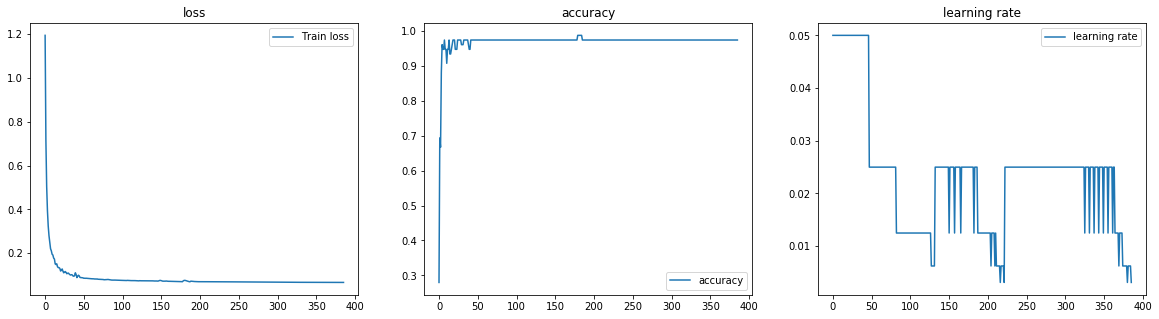

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [21]:
'''
trained gamma
'''
clf.current_gamma()

0.6634654

In [22]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.3, 3. , 1.1, 0.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.1, 3.8, 1.5, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3.1, 4.4, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [7.2, 3.2, 6. , 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 3.6, 1.4, 0.1],
       [5.4, 3.4, 1.5, 0.4],
       [5.7, 2.6, 3.5, 1. ]], dtype=float32)

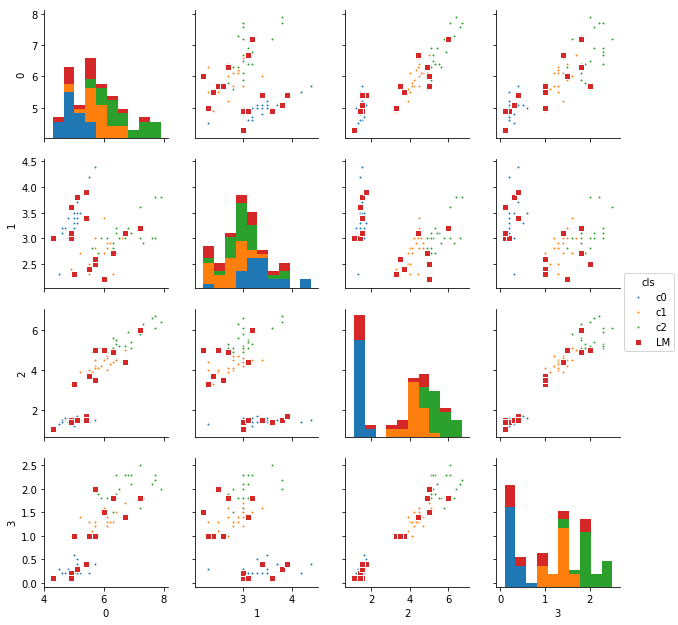

In [23]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [24]:
clf.predict_proba(xtest)[:5]

array([[1.00000000e+00, 7.23238092e-09, 1.80632741e-14],
       [1.00000000e+00, 1.14327126e-08, 3.00629665e-13],
       [1.00000000e+00, 7.85109400e-09, 2.69427052e-14],
       [1.00000000e+00, 1.79332922e-08, 4.97821348e-13],
       [9.99999523e-01, 4.85033581e-07, 3.64715480e-10]], dtype=float32)

In [25]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [26]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [27]:
pred_test = clf.predict(xtest)

In [28]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## set landmarks on input x

In [29]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[:3]
)

In [30]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 5.93 s, sys: 176 ms, total: 6.1 s
Wall time: 5.01 s


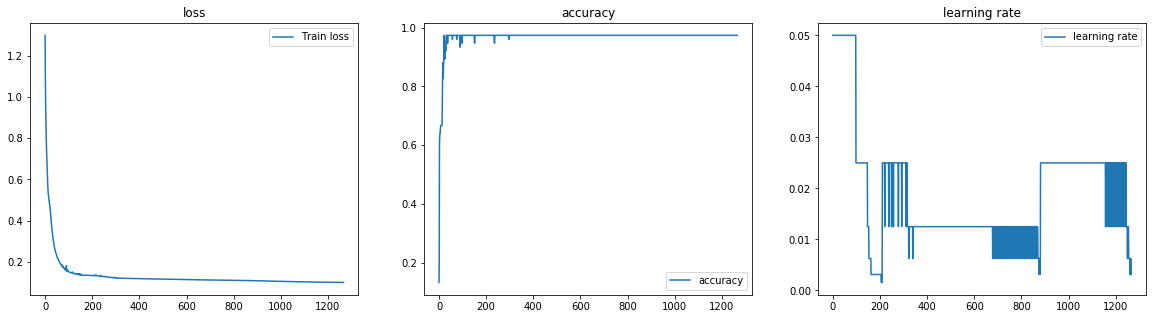

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [32]:
'''
trained gamma
'''
clf.current_gamma()

0.13946132

In [33]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=float32)

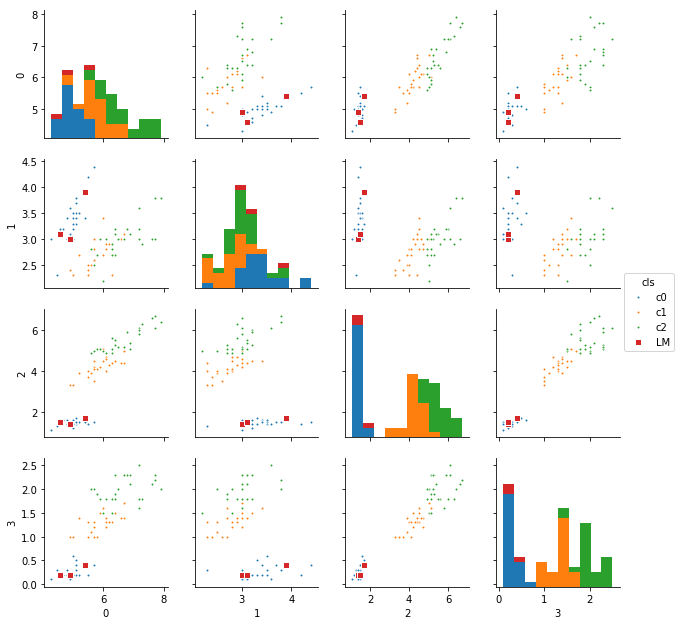

In [34]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [35]:
clf.predict_proba(xtest)[:5]

array([[9.9782264e-01, 2.1773723e-03, 2.9457178e-20],
       [9.9746192e-01, 2.5380403e-03, 7.6714287e-20],
       [9.9765682e-01, 2.3431657e-03, 3.7004907e-20],
       [9.9730980e-01, 2.6902452e-03, 8.1715848e-20],
       [9.9418044e-01, 5.8196206e-03, 1.8851382e-18]], dtype=float32)

In [36]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [37]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [38]:
pred_test = clf.predict(xtest)

In [39]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly

In [40]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 3, replace=False)]
)

In [41]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4 s, sys: 87.1 ms, total: 4.09 s
Wall time: 3.49 s


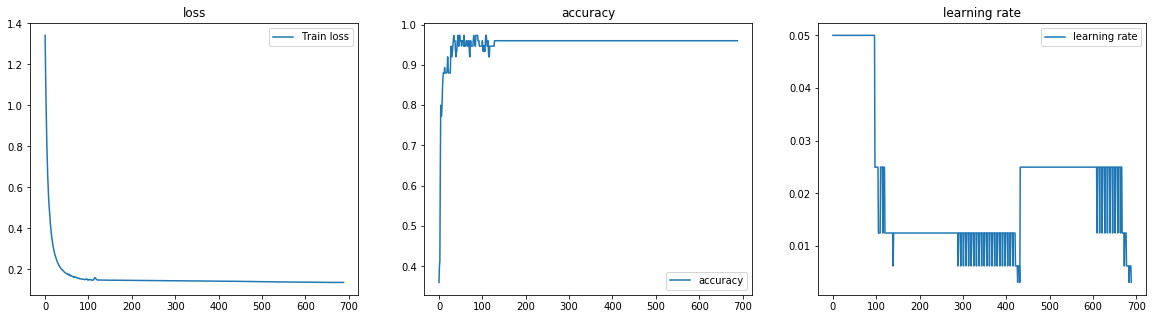

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [43]:
'''
trained gamma
'''
clf.current_gamma()

0.48488748

In [44]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[5. , 3.4, 1.5, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [5.6, 2.5, 3.9, 1.1]], dtype=float32)

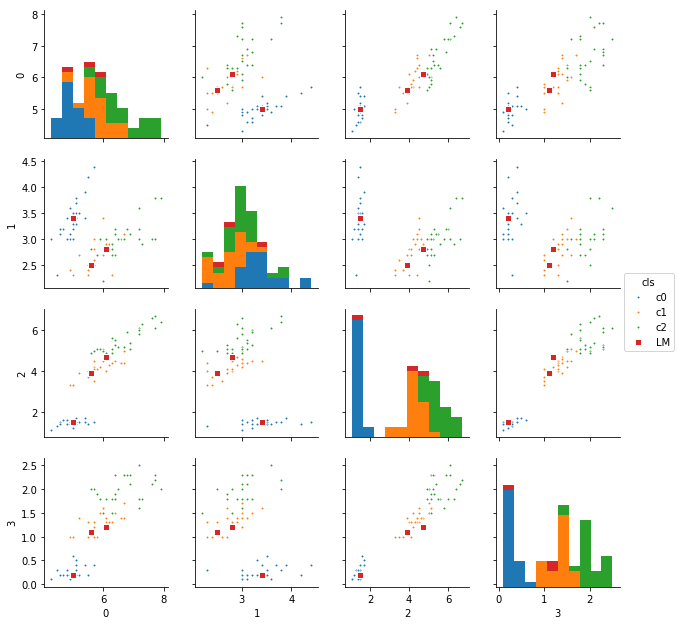

In [45]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [46]:
clf.predict_proba(xtest)[:5]

array([[9.99832153e-01, 1.28025189e-04, 3.97558542e-05],
       [9.99709904e-01, 1.90719278e-04, 9.93478825e-05],
       [9.99821603e-01, 1.32907313e-04, 4.55795307e-05],
       [9.99694943e-01, 1.99350732e-04, 1.05728075e-04],
       [9.98055220e-01, 6.75483723e-04, 1.26934587e-03]], dtype=float32)

In [47]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [48]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [49]:
pred_test = clf.predict(xtest)

In [50]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.8795664391810517
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      0.76      0.81        25
           2       0.79      0.88      0.83        25

   micro avg       0.88      0.88      0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75

[[25  0  0]
 [ 0 19  6]
 [ 0  3 22]]


## set landmarks on input x randomly (num_lm = 25)

In [51]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [52]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.57 s, sys: 14.8 ms, total: 2.58 s
Wall time: 2.41 s


In [53]:
clf.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 25)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 78        
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


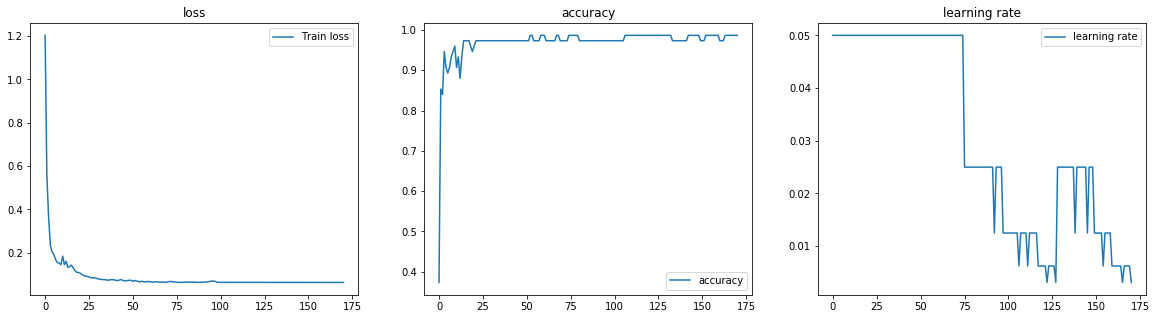

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [55]:
'''
trained gamma
'''
clf.current_gamma()

0.85169756

In [56]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 2.7, 5.1, 1.6],
       [5.4, 3.9, 1.7, 0.4],
       [5.7, 2.5, 5. , 2. ],
       [7.2, 3.6, 6.1, 2.5],
       [4.6, 3.1, 1.5, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.4, 1.5, 0.4],
       [6.7, 3. , 5. , 1.7],
       [6.4, 2.7, 5.3, 1.9],
       [6.7, 3. , 5. , 1.7],
       [5.7, 2.8, 4.1, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3. , 4.2, 1.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [6.4, 2.7, 5.3, 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.8, 4.9, 2. ]], dtype=float32)

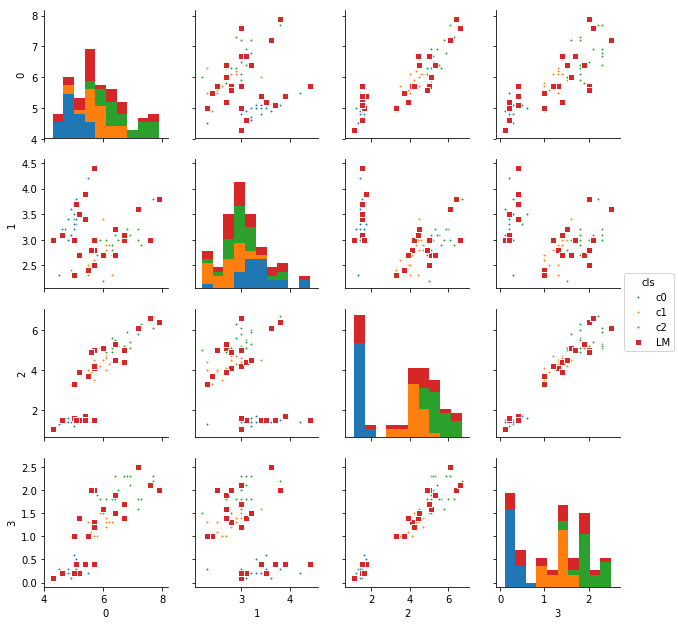

In [57]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [58]:
clf.predict_proba(xtest)[:5]

array([[1.0000000e+00, 5.4879376e-08, 5.2345445e-10],
       [9.9999988e-01, 8.9176275e-08, 3.3074754e-09],
       [9.9999988e-01, 7.1682898e-08, 8.3590351e-10],
       [9.9999988e-01, 1.4926697e-07, 5.5892615e-09],
       [9.9999833e-01, 1.4570869e-06, 2.0144351e-07]], dtype=float32)

In [59]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [60]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [61]:
pred_test = clf.predict(xtest)

In [62]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## set landmarks automatically on input x
* num_lm = 25

In [63]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [64]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.67 s, sys: 43.4 ms, total: 2.71 s
Wall time: 2.51 s


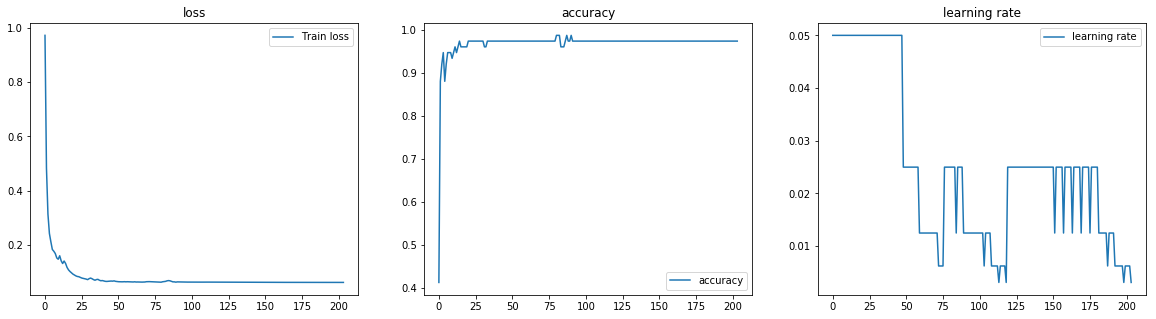

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [66]:
'''
trained gamma
'''
clf.current_gamma()

1.0825342

In [67]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 3.4, 4.5, 1.6],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.1, 3. , 4.6, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.4, 3.2, 4.5, 1.5]], dtype=float32)

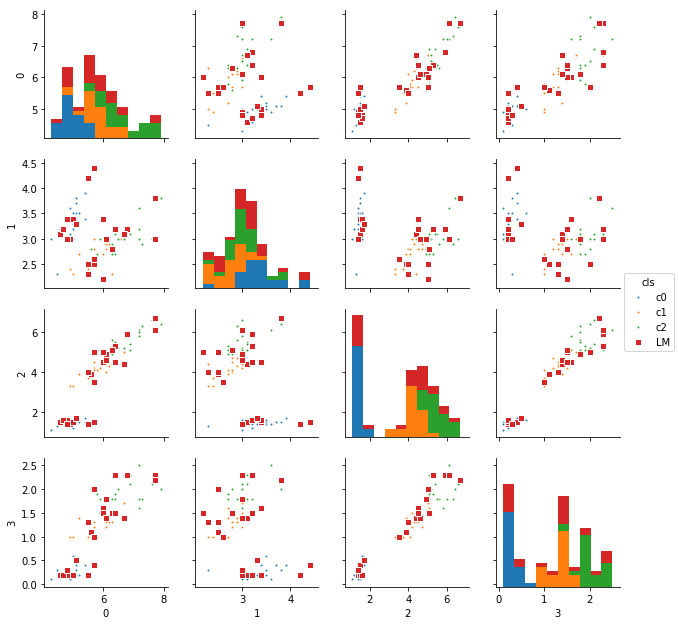

In [68]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [69]:
clf.predict_proba(xtest)[:5]

array([[1.00000000e+00, 1.23683375e-08, 2.64160343e-11],
       [1.00000000e+00, 9.98303662e-09, 1.33979529e-11],
       [1.00000000e+00, 1.69244831e-08, 4.22151168e-11],
       [1.00000000e+00, 2.00816519e-08, 3.55207010e-11],
       [9.99999404e-01, 6.39186965e-07, 3.43684170e-09]], dtype=float32)

In [70]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [71]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [72]:
pred_test = clf.predict(xtest)

In [73]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      1.00      0.96        25
           2       1.00      0.92      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 25  0]
 [ 0  2 23]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [74]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

In [75]:
init_lm

array([[6.74645951, 3.52363291, 4.31191615, 0.75157796],
       [7.60217459, 4.14150107, 4.30471844, 1.63659923],
       [5.59365558, 4.11840658, 3.31832157, 1.0928213 ],
       [6.99968638, 3.32466374, 5.93451849, 1.04525687],
       [7.09710088, 4.3369333 , 4.03929037, 1.97269871],
       [5.35194908, 4.35051242, 4.60847102, 1.93699926],
       [4.97027217, 2.6120949 , 2.76870667, 0.19268282],
       [5.91387774, 3.31901534, 3.58209454, 0.30119236],
       [6.15318785, 4.03860685, 4.62402004, 0.10051004],
       [6.56427319, 3.84900488, 3.13892542, 0.54505077],
       [4.44284183, 3.76922771, 3.52857639, 1.51131269],
       [6.65681359, 4.26001003, 2.00131452, 2.37139012],
       [7.0854723 , 2.51844645, 3.39814648, 1.75493155],
       [6.01012559, 3.57543994, 4.23761126, 0.26907379],
       [4.68396001, 3.02173468, 5.17926476, 1.41578029]])

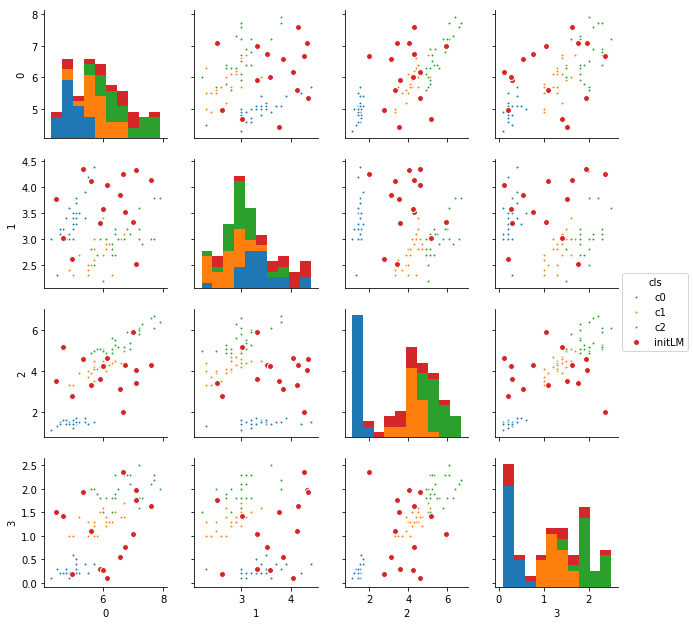

In [76]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [77]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.82 s, sys: 44.9 ms, total: 2.87 s
Wall time: 2.63 s


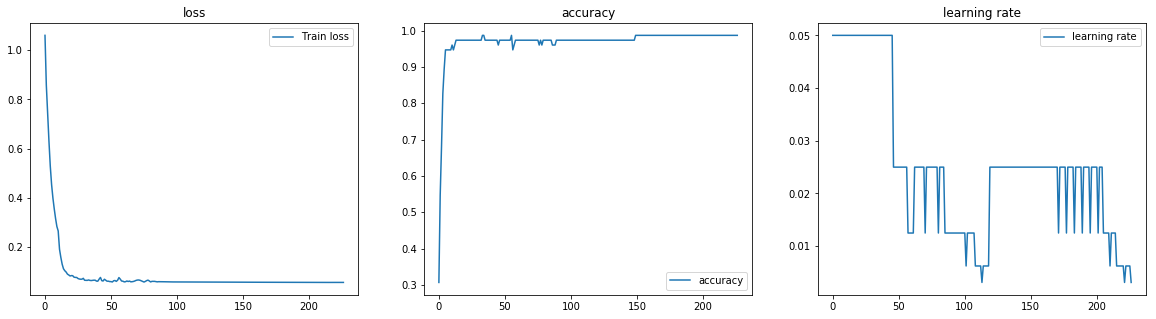

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [79]:
'''
trained gamma
'''
clf.current_gamma()

0.25216672

In [80]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[6.1116505 , 2.975936  , 3.9878082 , 0.7214748 ],
       [6.8430376 , 3.2632189 , 6.0393634 , 2.8076801 ],
       [5.941202  , 3.774683  , 2.5093064 , 0.2726681 ],
       [6.242173  , 2.4784677 , 6.0082726 , 2.5372157 ],
       [6.103707  , 3.3228695 , 5.553546  , 2.9011884 ],
       [5.6424294 , 2.8298316 , 5.167655  , 2.6177368 ],
       [5.098356  , 3.5990143 , 1.552879  , 0.03489811],
       [6.619872  , 3.2872548 , 3.908225  , 0.5182575 ],
       [6.6028395 , 3.4510858 , 4.172018  , 0.43406376],
       [6.845192  , 3.4530988 , 3.5655694 , 0.6566614 ],
       [5.159035  , 3.3180223 , 3.3192081 , 0.4159065 ],
       [5.141292  , 3.581165  , 1.1735077 , 0.38161153],
       [6.791376  , 3.283649  , 3.6482403 , 0.75294477],
       [6.112416  , 3.0887318 , 4.012762  , 0.5451368 ],
       [5.5189824 , 2.3096664 , 5.0170455 , 2.5625865 ]], dtype=float32)

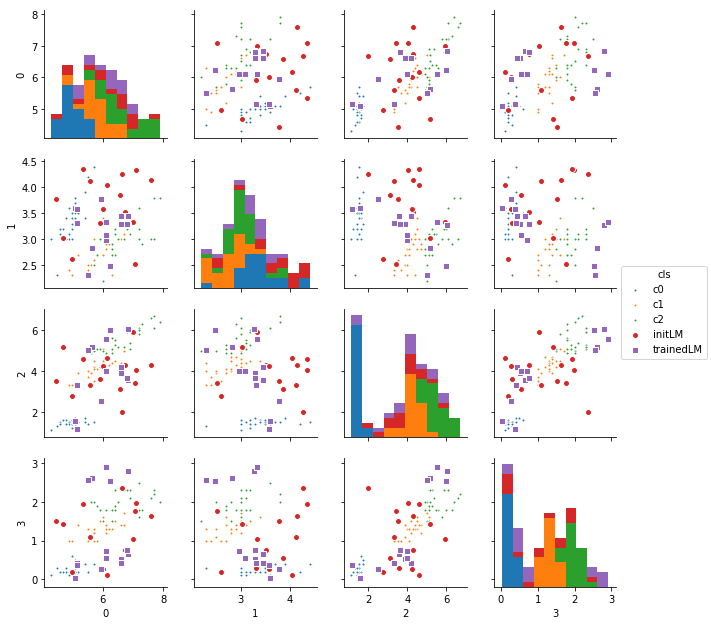

In [81]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [82]:
clf.predict_proba(xtest)[:5]

array([[9.9981147e-01, 1.8695473e-04, 1.5007299e-06],
       [9.9979573e-01, 1.9735238e-04, 6.8636646e-06],
       [9.9983740e-01, 1.6086611e-04, 1.6346312e-06],
       [9.9978536e-01, 2.0867182e-04, 5.9061435e-06],
       [9.9940884e-01, 5.4633897e-04, 4.4812503e-05]], dtype=float32)

In [83]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [84]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [85]:
pred_test = clf.predict(xtest)

In [86]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


## set initial landmarks manually and no train
* num_lm = 15
* train nothing, just activation

In [87]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [88]:
init_lm

array([[7.87050624, 4.13968946, 2.61416831, 1.41851076],
       [6.9128235 , 3.98347117, 3.86734653, 1.23061663],
       [5.70041192, 3.32561562, 3.27944494, 0.0757923 ],
       [7.15608849, 4.27760684, 5.10846705, 0.58517009],
       [7.00010438, 3.56607002, 3.18642337, 0.62261839],
       [7.11972562, 3.33210177, 3.46736991, 2.35539959],
       [7.94597516, 2.88511624, 5.25720947, 1.32896568],
       [6.87768498, 3.46837892, 5.32911419, 1.03300012],
       [4.84019503, 4.02117874, 4.790496  , 0.36163549],
       [5.24429463, 3.9751411 , 5.75286065, 1.96679852],
       [5.05846682, 2.53543702, 2.41099359, 2.43550924],
       [6.43368031, 3.78720497, 2.07754014, 1.07928701],
       [7.04448001, 3.28741164, 2.79539047, 0.34583098],
       [5.11648049, 2.51333257, 5.71818164, 0.57609559],
       [5.41936032, 3.47813919, 4.52501557, 1.99285155]])

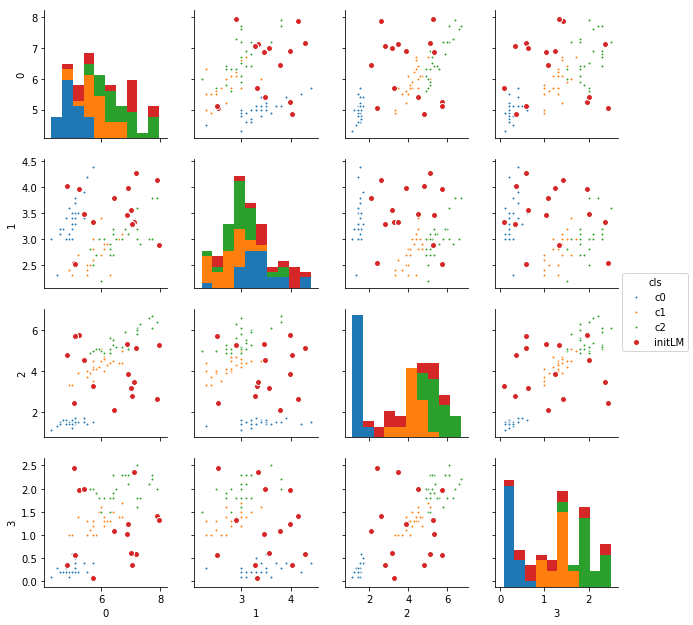

In [89]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [90]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 6.49 s, sys: 172 ms, total: 6.66 s
Wall time: 5.42 s


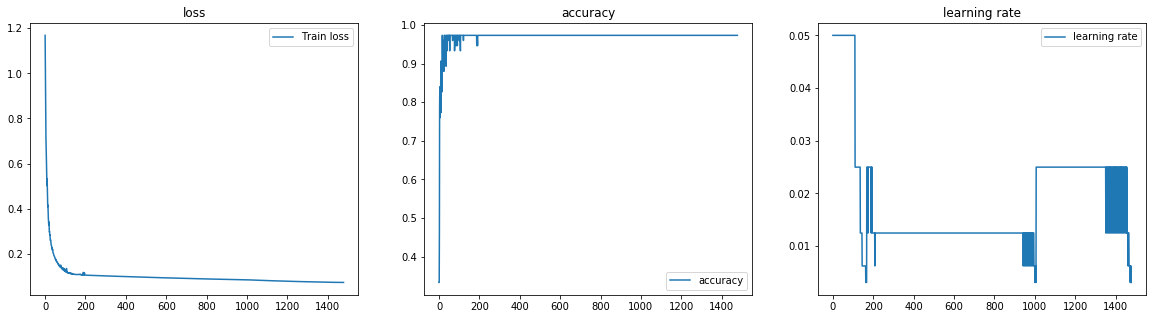

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [92]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [93]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [94]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[7.8705063 , 4.1396894 , 2.6141684 , 1.4185108 ],
       [6.9128237 , 3.9834712 , 3.8673465 , 1.2306167 ],
       [5.700412  , 3.3256156 , 3.279445  , 0.0757923 ],
       [7.1560884 , 4.277607  , 5.108467  , 0.5851701 ],
       [7.0001044 , 3.56607   , 3.1864233 , 0.6226184 ],
       [7.1197257 , 3.3321018 , 3.4673698 , 2.3553996 ],
       [7.9459753 , 2.8851163 , 5.2572093 , 1.3289657 ],
       [6.877685  , 3.468379  , 5.329114  , 1.0330001 ],
       [4.840195  , 4.0211787 , 4.790496  , 0.3616355 ],
       [5.2442946 , 3.975141  , 5.7528605 , 1.9667985 ],
       [5.058467  , 2.535437  , 2.4109936 , 2.4355092 ],
       [6.4336805 , 3.787205  , 2.0775402 , 1.079287  ],
       [7.04448   , 3.2874117 , 2.7953904 , 0.34583098],
       [5.1164804 , 2.5133326 , 5.7181816 , 0.5760956 ],
       [5.41936   , 3.4781392 , 4.5250154 , 1.9928515 ]], dtype=float32)

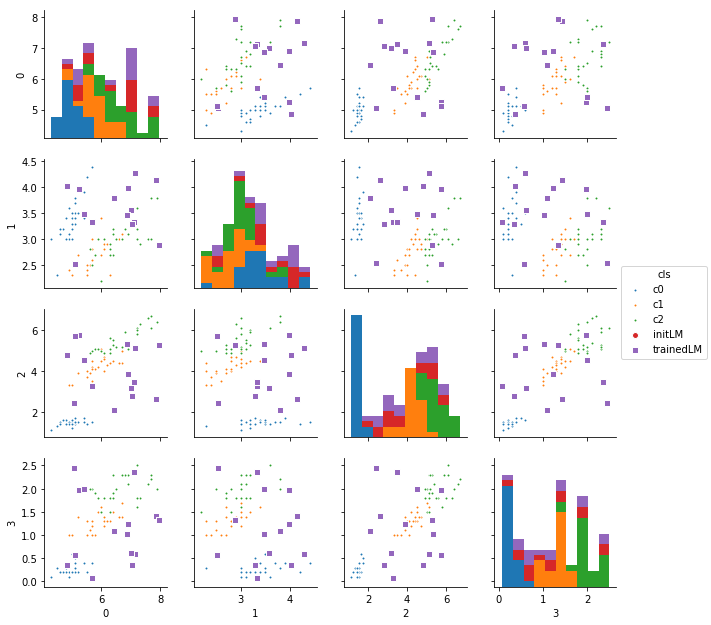

In [95]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [96]:
clf.predict_proba(xtest)[:5]

array([[9.9843353e-01, 1.5664920e-03, 2.7844360e-09],
       [9.9893004e-01, 1.0699650e-03, 1.4498957e-08],
       [9.9842513e-01, 1.5749303e-03, 4.1419628e-09],
       [9.9838710e-01, 1.6129016e-03, 2.4540144e-08],
       [9.9852461e-01, 1.4752473e-03, 9.0478366e-08]], dtype=float32)

In [97]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [98]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [99]:
pred_test = clf.predict(xtest)

In [100]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      1.00      0.96        25
           2       1.00      0.92      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 25  0]
 [ 0  2 23]]


## vector input

In [101]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [102]:
init_lm

array([[7.61120466, 4.45799641, 3.92819696, 0.49231506],
       [7.83377945, 4.01566649, 5.76632447, 2.07512283],
       [6.55546608, 3.47735548, 5.23669072, 0.56305969],
       [5.90763652, 2.70266157, 5.92724018, 0.73231471],
       [7.854863  , 3.75132563, 5.37429596, 0.95807079],
       [6.68709648, 3.97780101, 5.2336517 , 0.65408861],
       [4.3788583 , 2.81182489, 3.28709463, 1.60722927],
       [7.48699579, 4.04666946, 3.46666405, 0.08408462],
       [5.67810398, 3.09177739, 2.80316684, 1.32463328],
       [7.97940837, 3.31679416, 3.40709769, 0.90413193],
       [5.06928421, 3.03897731, 2.66061245, 2.04770787],
       [6.02258387, 2.70036512, 2.37703119, 2.20691007],
       [6.03780446, 4.12838865, 4.19095042, 0.1837548 ],
       [6.30487123, 2.82110998, 5.39309259, 2.17590173],
       [5.65154977, 2.92017585, 3.21351321, 0.33741585]])

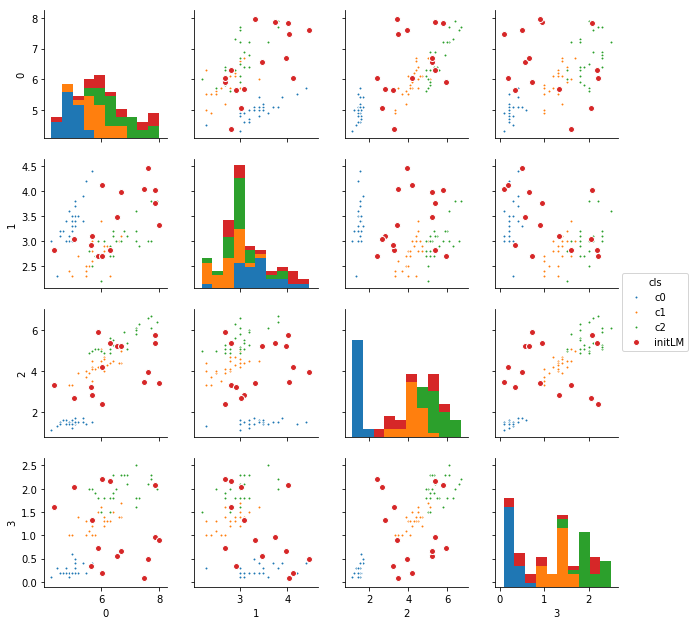

In [103]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [104]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [105]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [106]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 9.28 s, sys: 266 ms, total: 9.54 s
Wall time: 7.61 s


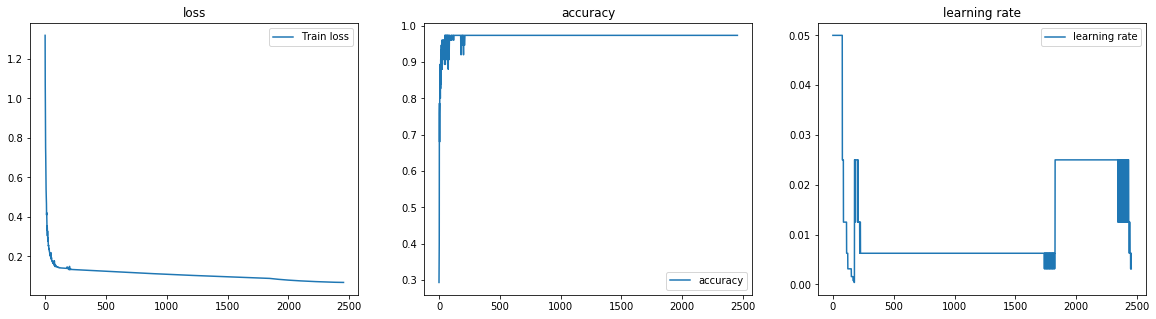

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [108]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [109]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [110]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[7.6112046 , 4.4579964 , 3.928197  , 0.49231505],
       [7.8337793 , 4.0156665 , 5.7663245 , 2.0751228 ],
       [6.555466  , 3.4773555 , 5.2366905 , 0.5630597 ],
       [5.9076366 , 2.7026615 , 5.9272404 , 0.7323147 ],
       [7.854863  , 3.7513256 , 5.374296  , 0.9580708 ],
       [6.6870966 , 3.977801  , 5.2336516 , 0.6540886 ],
       [4.378858  , 2.8118248 , 3.2870946 , 1.6072292 ],
       [7.4869957 , 4.0466695 , 3.466664  , 0.08408462],
       [5.678104  , 3.0917773 , 2.8031669 , 1.3246332 ],
       [7.9794083 , 3.3167942 , 3.4070976 , 0.90413195],
       [5.0692844 , 3.0389774 , 2.6606123 , 2.0477078 ],
       [6.022584  , 2.700365  , 2.377031  , 2.2069101 ],
       [6.0378046 , 4.128389  , 4.1909504 , 0.1837548 ],
       [6.304871  , 2.82111   , 5.3930926 , 2.1759017 ],
       [5.65155   , 2.9201758 , 3.2135131 , 0.33741584]], dtype=float32)

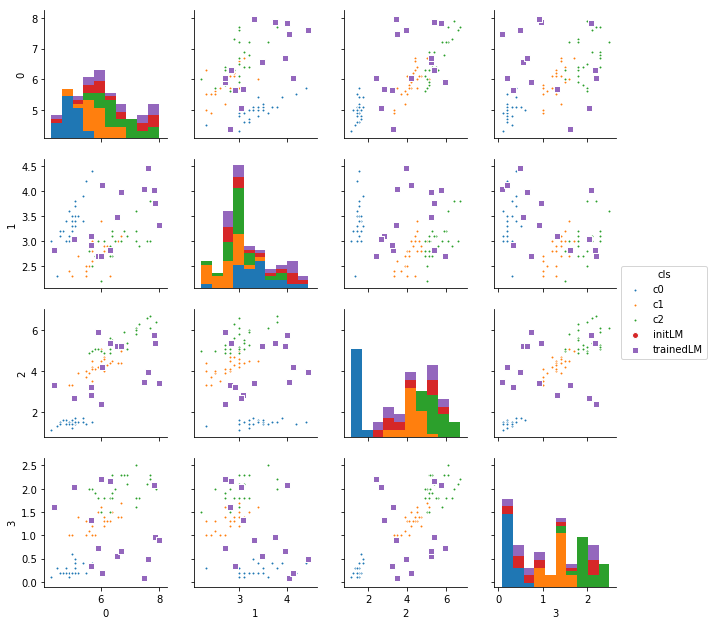

In [111]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [112]:
clf.predict_proba(xtest)[:5]

array([[9.9819607e-01, 1.8038531e-03, 1.2353723e-07],
       [9.9944311e-01, 5.5661850e-04, 2.7747254e-07],
       [9.9844956e-01, 1.5503345e-03, 1.4692534e-07],
       [9.9926823e-01, 7.3139748e-04, 3.5162009e-07],
       [9.9955529e-01, 4.4392658e-04, 7.6119341e-07]], dtype=float32)

In [113]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [114]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [115]:
pred_test = clf.predict(xtest)

In [116]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## Regressor

In [117]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [118]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 2.53 s, sys: 36.8 ms, total: 2.57 s
Wall time: 2.35 s


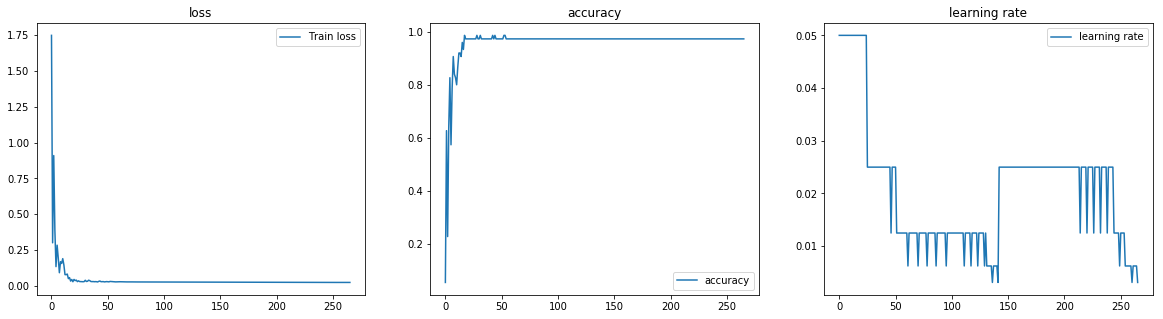

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [120]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [121]:
est.predict(xtrain)

array([-5.7560503e-03,  2.3384005e-02,  3.4502715e-02, -1.2204945e-03,
        3.4237117e-02,  3.8763493e-02, -6.8637043e-02,  2.6604623e-02,
       -4.9202979e-02, -2.1941662e-02, -3.0048996e-02,  7.5311422e-02,
        8.4244773e-02, -2.3142993e-03,  5.6110442e-02, -4.0400028e-04,
       -1.3447702e-03, -8.6529225e-02, -2.8644085e-02,  9.3963742e-04,
        4.0191829e-02,  6.6578090e-03, -1.6700685e-02, -2.2406846e-02,
       -3.0941337e-02,  1.0139059e+00,  1.1933482e+00,  1.1259136e+00,
        9.2194855e-01,  1.0992846e+00,  1.0855119e+00,  1.2263477e+00,
        8.6502993e-01,  8.3095193e-01,  9.9163628e-01,  9.2834175e-01,
        1.0578099e+00,  9.3449843e-01,  1.5616655e+00,  8.5744178e-01,
        9.6099961e-01,  1.7072232e+00,  1.0211031e+00,  1.1696343e+00,
        1.1448979e+00,  1.1272304e+00,  9.4667494e-01,  8.6493587e-01,
        9.4700396e-01,  1.0293603e+00,  1.9736872e+00,  1.9949783e+00,
        1.9999524e+00,  2.0346375e+00,  1.9741957e+00,  2.0615013e+00,
      

In [122]:
est.__dict__

{'build_fn': <function gkernel.sklearn.make_model>,
 'model': <keras.engine.training.Model at 0x7f0f1d98db38>,
 'sk_params': {'activation': 'linear',
  'callbacks': None,
  'epochs_warmup': 10,
  'lm': array([[5. , 2.3, 3.3, 1. ],
         [6.3, 2.8, 5.1, 1.5],
         [4.3, 3. , 1.1, 0.1],
         [4.8, 3.4, 1.6, 0.2],
         [4.6, 3.1, 1.5, 0.2],
         [6.4, 2.7, 5.3, 1.9],
         [5. , 3.3, 1.4, 0.2],
         [6.1, 2.9, 4.7, 1.4],
         [5.5, 2.5, 4. , 1.3],
         [5.1, 3.5, 1.4, 0.3],
         [5.6, 2.5, 3.9, 1.1],
         [4.8, 3.4, 1.6, 0.2],
         [5.7, 2.8, 4.5, 1.3],
         [6.1, 2.8, 4. , 1.3],
         [5.7, 4.4, 1.5, 0.4],
         [6.6, 3. , 4.4, 1.4],
         [4.6, 3.1, 1.5, 0.2],
         [5.2, 2.7, 3.9, 1.4],
         [6.2, 2.9, 4.3, 1.3],
         [5.9, 3. , 4.2, 1.5],
         [5.8, 2.7, 4.1, 1. ],
         [5.7, 2.8, 4.1, 1.3],
         [6.4, 3.2, 5.3, 2.3],
         [5.2, 3.5, 1.5, 0.2],
         [7.6, 3. , 6.6, 2.1],
         [4.3, 3. , 1.1, 

In [123]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 2ms/step


-0.023936799019575117

In [124]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 64us/step


-0.03402514119942983